# Load the dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sopyannnnn1","key":"f06b0a3416611b1475570f4c00d581f8"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d arashnic/book-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset
License(s): CC0-1.0


In [4]:
!unzip book-recommendation-dataset.zip

Archive:  book-recommendation-dataset.zip
  inflating: Books.csv               
  inflating: DeepRec.png             
  inflating: Ratings.csv             
  inflating: Users.csv               
  inflating: classicRec.png          
  inflating: recsys_taxonomy2.png    


Ada 3 file yang akan kita gunakan pada pembuat sistem rekomendasi buku kali ini yaitu 'Books.csv', 'Ratings.csv' dan 'Users.csv'

# Data Understanding

In [5]:
import pandas as pd

books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")
users = pd.read_csv("Users.csv")


<ipython-input-5-f2e435955bbb>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
print('Jumlah Buku: ', len(books.ISBN.unique()))
print('Jumlah Rating: ', len(ratings.ISBN.unique()))
print('Jumlah Pengguna: ', len(users['User-ID'].unique()))

Jumlah Buku:  271360
Jumlah Rating:  340556
Jumlah Pengguna:  278858


# Univariate Exploratory Data Analysis

## Books variabel

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
jumlah_judul_buku = books['Book-Title'].nunique()
jumlah_ISBN = books['ISBN'].nunique()

print(f"Jumlah judul buku: {jumlah_judul_buku}")
print(f"Jumlah ISBN: {jumlah_ISBN}")

Jumlah judul buku: 242135
Jumlah ISBN: 271360


- Jumlah ISBN: 271.360
ISBN (International Standard Book Number) adalah nomor identifikasi unik untuk setiap versi atau edisi buku. Satu judul buku bisa memiliki beberapa ISBN jika ada berbagai versi atau edisi dari buku tersebut, seperti versi hardcover, paperback, terjemahan bahasa lain, atau edisi cetak ulang. Oleh karena itu, jumlah ISBN biasanya lebih banyak daripada jumlah judul buku, karena setiap variasi edisi dianggap sebagai entri yang terpisah.
- Jumlah Judul Buku (Book-Title): 242.135
Ini menunjukkan jumlah judul buku yang berbeda. Satu judul bisa muncul lebih dari sekali dengan ISBN yang berbeda karena variasi versi buku tersebut.

In [12]:
jumlah_penulis = books['Book-Author'].nunique()
print(f"Jumlah Penluis Buku: {jumlah_penulis}")

Jumlah Penluis Buku: 102022


Terdapat 102.024 jumlah penulis dari 271.360 jenis ISBN buku yang berbeda dan terdapat beberapa buku yang ditulis oleh penulis yang sama.

## Ratings variabel

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [14]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [15]:
jumlah_rating = ratings['ISBN'].nunique()

print(f"Jumlah Rating: {jumlah_rating}")

Jumlah Rating: 340556


In [16]:
# Filter buku yang diberi rating (rating > 0)
buku_diberi_rating = ratings[ratings['Book-Rating'] > 0]

# Hitung jumlah ISBN unik yang memiliki rating
jumlah_buku_diberi_rating = buku_diberi_rating['ISBN'].nunique()

print(f"Jumlah buku yang diberi rating: {jumlah_buku_diberi_rating}")

Jumlah buku yang diberi rating: 185973


Jumlah rating mencapai 340.556, sementara hanya 185.973 buku yang diberi rating lebih dari 0, menunjukkan bahwa tidak semua buku mendapatkan rating dari pengguna.

## Users variabel

In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [18]:
print('Banyak pengguna:', len(users['User-ID'].unique()))
print('Lokasi pengguna:', users['Location'].unique())

Banyak pengguna: 278858
Lokasi pengguna: ['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']


# Data Preprocessing

## Menggabungkan file buku dan rating berdasarkan nomor ISBN

In [19]:
merged = pd.merge(ratings, books, on='ISBN', how='left')

print("Jumlah data merged:", len(merged))
merged

Jumlah data merged: 1149780


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996,Scholastic,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...,http://images.amazon.com/images/P/0590442449.0...


# Data Preparation

## Mengecek Missing Values

In [20]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [21]:
users.dropna(inplace=True)

In [22]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,0


In [23]:
merged.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,118644
Book-Author,118646
Year-Of-Publication,118644
Publisher,118646
Image-URL-S,118644
Image-URL-M,118644
Image-URL-L,118648


In [24]:
merged.dropna(inplace=True)

In [25]:
merged.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [26]:
# Membuat variabel preparation yang berisi dataframe fix_resto kemudian mengurutkan berdasarkan placeID
preparation = merged
preparation.sort_values('ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...
103677,23902,0001046438,9,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...
...,...,...,...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002,Knopf,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...,http://images.amazon.com/images/P/B000234NC6.0...
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0,Viking Adult,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...,http://images.amazon.com/images/P/B00029DGGO.0...
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0,Digireads.com,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...,http://images.amazon.com/images/P/B0002JV9PY.0...


In [27]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1149701,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1149747,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1149757,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1149770,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [28]:
# Mengonversi data series ‘ISBN’ menjadi dalam bentuk list
rating = preparation['Book-Rating'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
books_name = preparation['Book-Title'].tolist()

books_isbn = preparation['ISBN'].tolist()


print(len(rating))
print(len(books_name))
print(len(books_isbn))

270144
270144
270144


In [29]:
data_new = pd.DataFrame()
data_new['ISBN'] = books_isbn
data_new['Book-Title'] = books_name
data_new['Book-Rating'] = rating
data_new

,ISBN,Book-Title,Book-Rating
0,034545104X,Flesh Tones: A Novel,0
1,0155061224,Rites of Passage,5
2,0446520802,The Notebook,0
3,052165615X,Help!: Level 1,3
4,0521795028,The Amsterdam Connection : Level 4 (Cambridge ...,6
...,...,...,...
270139,0517145553,Mostly Harmless,0
270140,1575660792,Gray Matter,7
270141,0590907301,Triplet Trouble and the Class Trip (Triplet Tr...,0
270142,0679752714,A Desert of Pure Feeling (Vintage Contemporaries),0


# Model Development dengan Content Based Filtering

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
data = data_new
data.sample(5)

,ISBN,Book-Title,Book-Rating
13510,0385322135,The Voice on the Radio,0
163055,1561580791,Garden Design Ideas (The Best of Fine Gardening),6
204298,0061053295,Incarnations: Three Plays by Clive Barker,0
83139,037371114X,Child of Their Vows (9 Months Later),3
224667,1564583090,Counting Rhymes,0


In [32]:
# Gunakan hanya 10.000 baris pertama
data_cut = data_new.head(10000)

In [33]:
# Konversi kolom judul buku ke dalam bentuk list
books_title_list = data_cut['Book-Title'].tolist()

In [34]:
# Simpan data hasil preprocessing ke dalam variabel books_new
books_new = data_cut.copy()

## TF-IDF Vectorizer

In [35]:
# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transformasi judul buku ke bentuk matriks TF-IDF
tfidf_matrix = tfidf.fit_transform(books_title_list)

# Konversi ke bentuk dense matrix
tfidf_dense = tfidf_matrix.todense()

print("Shape of TF-IDF Matrix:", tfidf_matrix.shape)

Shape of TF-IDF Matrix: (10000, 11133)


## Cosine Similarity

In [36]:
# Hitung kemiripan antar judul buku
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

print("Shape of Cosine Similarity Matrix:", cosine_sim_matrix.shape)

Shape of Cosine Similarity Matrix: (10000, 10000)


In [37]:
# Konversi cosine_sim_matrix jadi DataFrame
cosine_sim_df = pd.DataFrame(
    cosine_sim_matrix,
    index=books_new['ISBN'],
    columns=books_new['ISBN']
)

## Mendapatkan Rekomendasi

In [38]:
def book_recommendations_by_isbn(isbn_buku, similarity_data=cosine_sim_df, items=books_new[['ISBN', 'Book-Title', 'Book-Rating']], k=5):
    # Cek apakah ISBN ada di kolom similarity
    if isbn_buku not in similarity_data.columns:
        return f"ISBN '{isbn_buku}' tidak ditemukan dalam data."

    # Ambil index dengan similarity tertinggi
    index = similarity_data.loc[:, isbn_buku].to_numpy().argpartition(range(-1, -k, -1))

    # Ambil ISBN yang paling mirip (tertinggi kemiripannya)
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Hapus ISBN input supaya nggak direkomendasiin dirinya sendiri
    closest = closest.drop(isbn_buku, errors='ignore')

    # Gabung dengan data buku agar dapat judul dan rating
    return pd.DataFrame({'ISBN': closest}).merge(items, on='ISBN', how='left').head(k)


In [39]:
books_new[books_new['ISBN'] == '0449143600']

,ISBN,Book-Title,Book-Rating
5519,0449143600,Love by Fire,0


In [40]:
book_recommendations_by_isbn('0449143600')

,ISBN,Book-Title,Book-Rating
0,0843928395,All I Could Do Was Love You,9
1,0375409440,Love,8
2,0373025823,Perhaps Love,0
3,0440147247,In the Name of Love,0
4,0553275283,Love Story,8


# Model Development dengan Collaborative Filtering

In [118]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [119]:
# Load Data
books = pd.read_csv("Books.csv")
ratings = pd.read_csv("Ratings.csv")

<ipython-input-119-ad0c3b81e8f1>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


## Data Preparation

In [120]:
merged = pd.merge(ratings, books, on='ISBN', how='left')
merged.dropna(inplace=True)

In [121]:
df = ratings.head(10000).copy()

In [122]:
# Encoding user dan isbn
user_ids = df['User-ID'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

isbn_ids = df['ISBN'].unique().tolist()
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_ids)}
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_ids)}

In [124]:
# Mapping encoded id
df['user'] = df['User-ID'].map(user_to_user_encoded)
df['books'] = df['ISBN'].map(isbn_to_isbn_encoded)

In [128]:
# Konversi rating ke float
df['Book-Rating'] = df['Book-Rating'].values.astype(np.float32)

# Normalisasi rating 0-1
min_rating = df['Book-Rating'].min()
max_rating = df['Book-Rating'].max()

## Membagi Data untuk Training dan Validasi

In [129]:
# Membuat variabel training dan validation
x = df[['user', 'books']].values
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Split data
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[   0    0]
 [   1    1]
 [   2    2]
 ...
 [ 940  960]
 [ 940 2857]
 [ 940 2031]] [0.  0.5 0.  ... 0.  0.  0. ]


## Proses Training

In [130]:
# Model RecommenderNet
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(num_users, embedding_size,
                                               embeddings_initializer='he_normal',
                                               embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)
        self.books_embedding = layers.Embedding(num_books, embedding_size,
                                                embeddings_initializer='he_normal',
                                                embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.books_bias = layers.Embedding(num_books, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        books_vector = self.books_embedding(inputs[:, 1])
        books_bias = self.books_bias(inputs[:, 1])
        dot_user_books = tf.tensordot(user_vector, books_vector, 2)
        x = dot_user_books + user_bias + books_bias
        return tf.nn.sigmoid(x)

In [131]:
# Compile model
num_users = len(user_to_user_encoded)
num_books = len(isbn_to_isbn_encoded)

model = RecommenderNet(num_users, num_books)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


In [132]:
# Train model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6521 - root_mean_squared_error: 0.4359 - val_loss: 0.5795 - val_root_mean_squared_error: 0.3787
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4257 - root_mean_squared_error: 0.3095 - val_loss: 0.5469 - val_root_mean_squared_error: 0.3596
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.4155 - root_mean_squared_error: 0.3053 - val_loss: 0.5220 - val_root_mean_squared_error: 0.3458
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.4010 - root_mean_squared_error: 0.2970 - val_loss: 0.5017 - val_root_mean_squared_error: 0.3355
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3837 - root_mean_squared_error: 0.2880 - val_loss: 0.4861 - val_root_mean_squared_error: 0.3283
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3820 - root_mean_squared_error: 0.2877 - val_loss: 0.4740 - val_root_mean_squared_error: 0.3233
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s

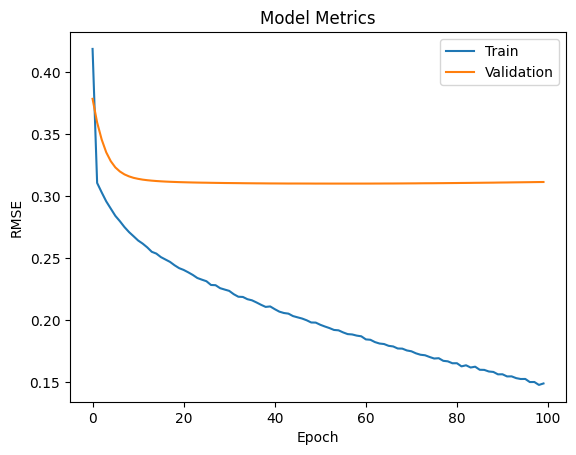

In [133]:
# Plot RMSE
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


## Mendapatkan Rekomendasi Buku

In [134]:
# Mengambil sample user
user_id = ratings['User-ID'].sample(1).iloc[0]
books_visited_by_user = ratings[ratings['User-ID'] == user_id]

# Pilih random user_id yang memang ada di user_to_user_encoded
user_id = np.random.choice(list(user_to_user_encoded.keys()))

# User encoder dijamin ada
user_encoder = user_to_user_encoded.get(user_id)

In [135]:
# Data buku yang belum dikunjungi
books_not_visited = merged[~merged['ISBN'].isin(ratings[ratings['User-ID'] == user_id]['ISBN'].values)]['ISBN']
books_not_visited = list(set(books_not_visited).intersection(set(isbn_to_isbn_encoded.keys())))
books_not_visited = [[isbn_to_isbn_encoded.get(x)] for x in books_not_visited]

In [136]:
# Buat array prediksi
user_books_array = np.hstack(([[user_encoder]] * len(books_not_visited), books_not_visited))
user_books_array = np.array(user_books_array).astype(np.int32)

In [137]:
# Prediksi rating
ratings_pred = model.predict(user_books_array).flatten()

252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [140]:
# Top rekomendasi
top_ratings_indices = ratings_pred.argsort()[-10:][::-1]
recommended_books_ids = [isbn_encoded_to_isbn.get(books_not_visited[x][0]) for x in top_ratings_indices]

print(f'Showing recommendations for user: {user_id}')
print('='*30)
print('Books with High Ratings from User:')
print('-'*30)
top_books_user = (
    books_visited_by_user.sort_values(by='Book-Rating', ascending=False)
    .head(5)
    .ISBN.values
)

for isbn in top_books_user:
    if isbn in books['ISBN'].values:
        title = books[books['ISBN'] == isbn]['Book-Title'].values[0]
    else:
        title = "Buku tidak ditemukan"
    rating = books_visited_by_user[books_visited_by_user['ISBN'] == isbn]['Book-Rating'].values[0]
    print(f"{title}: {rating}")

print('-'*30)
print('Top 10 Book Recommendations:')
print('-'*30)

for isbn in recommended_books_ids:
    title = books[books['ISBN'] == isbn]['Book-Title'].values[0]
    print(title)


Showing recommendations for user: 190
Books with High Ratings from User:
------------------------------
Buku tidak ditemukan: 10
Buku tidak ditemukan: 10
Buku tidak ditemukan: 10
Buku tidak ditemukan: 9
Buku tidak ditemukan: 9
------------------------------
Top 10 Book Recommendations:
------------------------------
The Watsons Go to Birmingham - 1963 (Yearling Newbery)
Julia's Last Hope (Oke, Janette, Women of the West.)
Lord of the Flies
Tender at the Bone: Growing Up at the Table
Ice Bound: A Doctor's Incredible Battle for Survival at the South Pole
Bias: A CBS Insider Exposes How the Media Distort the News
Into the Wild
The King of Torts
The Shipping News : A Novel
Rebecca


In [141]:
def show_recommendations(recommended_books_ids, books_df):
    for isbn in recommended_books_ids:
        if isbn in books_df['ISBN'].values:
            title = books_df[books_df['ISBN'] == isbn]['Book-Title'].values[0]
            print(f"{isbn} - {title}")
        else:
            print(f"{isbn} - Buku tidak ditemukan dalam dataset.")

# Mengecek apakah buku ada di dataset:
show_recommendations(recommended_books_ids, books)


0440414121 - The Watsons Go to Birmingham - 1963 (Yearling Newbery)
1556611536 - Julia's Last Hope (Oke, Janette, Women of the West.)
0399501487 - Lord of the Flies
0767903382 - Tender at the Bone: Growing Up at the Table
0786866845 - Ice Bound: A Doctor's Incredible Battle for Survival at the South Pole
0895261901 - Bias: A CBS Insider Exposes How the Media Distort the News
0385486804 - Into the Wild
0440241537 - The King of Torts
0743225406 - The Shipping News : A Novel
0380778556 - Rebecca
